In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# loading data
preds = np.load("../results/preds.np")
label = np.load("../results/label.np")
print(preds.shape)

# create prd dataframe
preds = pd.Series(preds.tolist())
res = pd.DataFrame({'pred':preds, 'label': label})
#res["count"] = res.apply(lambda row: len(res[res["label"] == row["label"]]), axis=1)
#res = res[res["count"] > 90]


print(len(res))

(124, 128)
124


In [3]:
def create_positif(df, nbr):
    duets = []
    list_label = list(set(df["label"].tolist()))
    
    for elem in range(nbr):
        chosen_label = random.choice(list_label)
        
        # select duet
        select = df[df["label"] == chosen_label]
        samp = select.sample(2)
        samp = samp["pred"].tolist()
        d = (samp[0], samp[1])
        
        duets.append(d)
        
    return duets
        
        

def create_negatif(df, nbr):
    duets = []
    list_label = list(set(df["label"].tolist()))
    
    for elem in range(nbr):
        chosen_label = random.choice(list_label)
        
        # select duet
        pos = df[df["label"] == chosen_label]
        neg = df[~(df["label"] == chosen_label)]
        
        p_samp = pos.sample(1)
        n_samp = neg.sample(1)
        
        p_samp = p_samp["pred"].tolist()[0]
        n_samp = n_samp["pred"].tolist()[0]
        
        
        d = (p_samp, n_samp)
        
        duets.append(d)
        
    return duets
        



In [8]:
positives = create_positif(res, 100)
negatives = create_negatif(res, 100)

print(len(positives))
print(len(negatives))

100
100


In [14]:
# Evaluation of the model

limit_dist = 0.0000158

tp = 0
tn = 0
fp = 0
fn = 0

# Evaluate positif
cosine_pos = []
eucli = []
for pos in positives:
    t1 = np.array([pos[0]])
    t2 = np.array([pos[1]])
    cosine_pos.append(cosine_similarity(t1, t2)[0][0])
    eucli.append(np.linalg.norm(t1[0]-t2[0]))
    if eucli[-1] <= limit_dist:
        tp += 1
    else:
        fn += 1

c = np.array(cosine_pos)
e = np.array(eucli)
print("Moyenne consine {} for {}".format(c.mean(), len(c)))
print("Moyenne eucli {} for {}".format(e.mean(), len(e)))


cosine_neg = []
eucli = []
for neg in negatives:
    t1 = np.array([neg[0]])
    t2 = np.array([neg[1]])
    cosine_neg.append(cosine_similarity(t1, t2)[0][0])
    eucli.append(np.linalg.norm(t1[0]-t2[0]))
    
    if eucli[-1] > limit_dist:
        tn += 1
    else:
        fp += 1
    
c = np.array(cosine_neg)
e = np.array(eucli)
print("Moyenne consine {}".format(c.mean()))
print("Moyenne eucli {} for {}".format(e.mean(), len(e)))

print("\n\n")

accuracy = (tp + tn) / 10000
precision = tp /(fp + tp)
recall = tp / (fn+tp)
f1 = 2*((precision*recall)/(precision+recall))

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1: {}".format(f1))

NameError: name 'positives' is not defined

In [8]:
# Evaluation with confusion matrice

y_true = []
y_pred = []

for index, row in res.iterrows():
    true_label = row["label"]
    embed = np.array([row["pred"]])
    print(index)
    
    best_cosine = 1000
    pred_label = ""
    
    for ifound, irow in res.iterrows():
        if ifound == index:
            continue
        
        ie = np.array([irow["pred"]])
        #cos = cosine_similarity(embed, ie)[0][0]
        cos = np.linalg.norm(embed[0]-ie[0])
        
        if cos < best_cosine:
            best_cosine = cos
            pred_label = irow["label"]
            
    
    y_true.append(true_label)
    y_pred.append(pred_label)
        



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


['1' '2' '3' '4' '5']


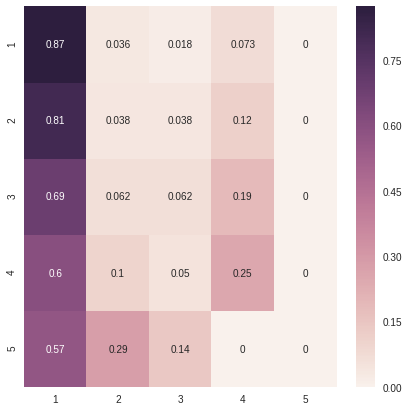

In [9]:
confusion = confusion_matrix(y_true, y_pred)
confusion = confusion / confusion.sum(axis=1)[:, np.newaxis]

classes = unique_labels(y_true, y_pred)
print(classes)

df_cm = pd.DataFrame(confusion, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize=(7,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(50,50))
sn.heatmap(df_cm, annot=True)
plt.savefig("epic.jpg")

In [ ]:
y = ["True", "False, "]